In [81]:
from sklearn.cluster import KMeans
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [83]:
txt = np.loadtxt('./test.txt',delimiter=',')
print txt

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 9.  9.  9.]
 [ 9.  9.  8.]
 [ 8.  9.  9.]
 [ 9.  8.  9.]]


In [84]:
dst_dict={}
label_dict={}
center_dict={}

for i in {1,2,3,4,5,6}:
    kmeans=KMeans(n_clusters=i,
                  max_iter=100,
                  init='k-means++',
                  algorithm='elkan',
                  precompute_distances=True,
                  n_jobs=-1,
                  random_state=0).fit(txt)
    
    print 'cluster_num:', i
    
    #Sum of squared distances of samples to their closest cluster center.
    dst_dict[i] = kmeans.inertia_
    
    #Labels of each point
    label_dict[i] = kmeans.labels_
    
    #Coordinates of cluster centers array
    center_dict[i] = kmeans.cluster_centers_
    
    print 'sum_distance:%0.2f,\nlabel:%s,\ncenters:\n%s\n' %(dst_dict[i],label_dict[i],center_dict[i])

cluster_num: 1
sum_distance:438.00,
label:[0 0 0 0 0 0 0 0],
centers:
[[ 4.5  4.5  4.5]]

cluster_num: 2
sum_distance:4.50,
label:[1 1 1 1 0 0 0 0],
centers:
[[ 8.75  8.75  8.75]
 [ 0.25  0.25  0.25]]

cluster_num: 3
sum_distance:3.58,
label:[1 1 2 1 0 0 0 0],
centers:
[[ 8.75        8.75        8.75      ]
 [ 0.33333333  0.33333333  0.        ]
 [ 0.          0.          1.        ]]

cluster_num: 4
sum_distance:2.67,
label:[2 1 2 2 0 0 0 3],
centers:
[[ 8.66666667  9.          8.66666667]
 [ 0.          1.          0.        ]
 [ 0.33333333  0.          0.33333333]
 [ 9.          8.          9.        ]]

cluster_num: 5
sum_distance:1.83,
label:[1 1 2 3 0 4 0 0],
centers:
[[ 8.66666667  8.66666667  9.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.          1.        ]
 [ 1.          0.          0.        ]
 [ 9.          9.          8.        ]]

cluster_num: 6
sum_distance:1.00,
label:[1 1 2 3 0 4 5 0],
centers:
[[ 9.   8.5  9. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   1. 

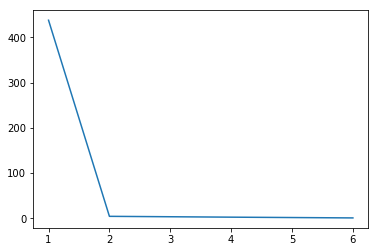

In [85]:
plt.plot(dst_dict.keys(),dst_dict.values())
plt.show()

In [86]:
# choose cluster_num = 2
kmeans=KMeans(n_clusters=2,
                  max_iter=100,
                  init='k-means++',
                  algorithm='elkan',
                  precompute_distances=True,
                  n_jobs=-1,
                  random_state=0).fit(txt)

In [87]:
target1_cluster = kmeans.predict(np.array([1,1,1]).reshape(1,-1))[0]
target2_cluster = kmeans.predict(np.array([8,8,8]).reshape(1,-1))[0]
print '[1,1,1] target cluster:',target1_cluster
print '[8,8,8] target cluster:',target2_cluster

[1,1,1] target cluster: 1
[8,8,8] target cluster: 0
